In [2]:
from network_proc import *

In [3]:
cancer_gene_names_list = load_cancer_gene_name_from_file(filename = "cg-2022-06.csv")
gene_names_dict, gene_ids_dict = load_gene_mapping_from_file(filename = "identifier_mappings.txt")

In [4]:
file_pre = "All"
comb_directory = r'.\importance\all-combined'

In [5]:
filename = "all-combined.txt"
filepath = os.path.join(comb_directory, filename)
G = nx.Graph()
G = nx.read_weighted_edgelist(filepath)

In [6]:
nodes_imp = cal_nodes_imp(G)

In [7]:
nodes_imp_sorted_list = sorted(nodes_imp.items(), key = operator.itemgetter(1), reverse = True)
x_fpr, y_tpr = cal_roc_xy(nodes_imp_sorted_list, cancer_gene_names_list, gene_names_dict, interval = 100)

In [8]:
network_aucs = auc(y_tpr)

In [9]:
filepath = os.path.join(comb_directory, file_pre + '-auc.tsv')
with open(filepath, 'w') as write_obj:
    write_obj.write(file_pre + '\t' + str(network_aucs) + '\n')
network_aucs

0.7121288515406168

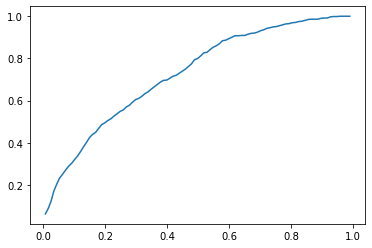

In [10]:
plt.plot(x_fpr, y_tpr)
plt.show()

In [11]:
filepath = os.path.join(comb_directory, file_pre + '-gene-imp.tsv')
with open(filepath, 'w') as write_obj:
    for edge in nodes_imp_sorted_list:
        write_obj.write(edge[0] + '\t' + str(edge[1]) + '\n')

In [12]:
filepath = os.path.join(comb_directory, file_pre + '-fpr-tpr.tsv')
with open(filepath, 'w') as write_obj:
    for i in range(len(x_fpr)):
        write_obj.write(str(x_fpr[i]) + '\t' + str(y_tpr[i]) + '\n')